# % Clientes que alcanzaron cada paso

La gráfica actual muestra el porcentaje de clientes que alcanzaron cada paso del proceso (es decir, la tasa de conversión en cada etapa). Con esa información puedes deducir el "drop-off" (la caída entre etapas) restando, por ejemplo, el porcentaje de clientes que llegaron a "step_1" del porcentaje que llegaron a "start", y así sucesivamente.

=== Funnel de Conversión a Nivel de Cliente (por paso) ===
variation    Control       Test
start      99.454758  99.050757
step_1     85.544340  90.103554
step_2     79.154650  82.533145
step_3     73.918529  77.312309
confirm    65.248738  68.949557


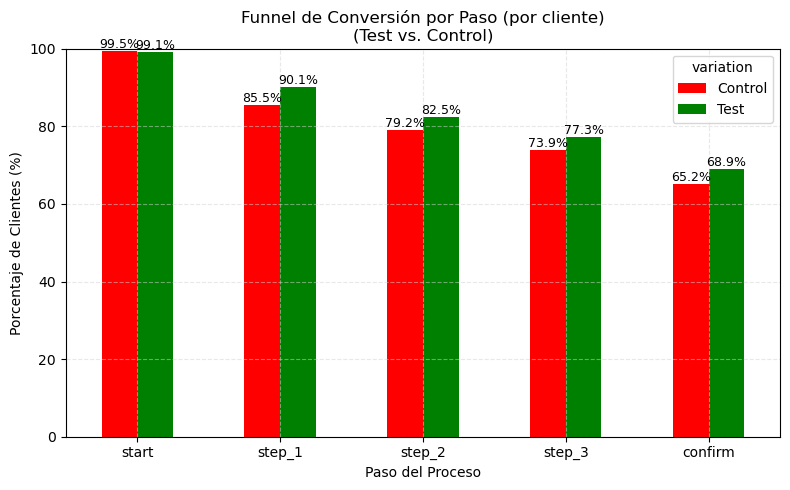

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# PASO 1: Cargar el DataFrame ya procesado
# --------------------------------------------------
df = pd.read_csv("../../data/processed/navegacion_clientes_experimento_limpio.csv")

# Asegurarse de filtrar para los grupos válidos (Test y Control)
df = df[df["variation"].isin(["Test", "Control"])].copy()

# --------------------------------------------------
# PASO 2: Agrupar a nivel de cliente
# --------------------------------------------------
# Para cada cliente (client_id) y su grupo (variation), determinamos si alcanzó cada paso.
# Definimos los pasos del proceso:
steps = ["start", "step_1", "step_2", "step_3", "confirm"]

# Construimos una lista de registros, uno por cliente, con indicadores booleanos para cada paso.
client_records = []
for (variation, client_id), group in df.groupby(["variation", "client_id"]):
    record = {"variation": variation, "client_id": client_id}
    # Para cada paso, verificamos si el cliente tuvo al menos un registro con ese paso
    for step in steps:
        record[step + "_reached"] = group["process_step"].eq(step).any()
    client_records.append(record)

df_clients = pd.DataFrame(client_records)

# --------------------------------------------------
# PASO 3: Calcular el funnel de conversión a nivel de cliente
# --------------------------------------------------
# Para cada grupo (variation) y cada paso, calculamos la tasa (proporción) de clientes que lo alcanzaron.
# Debido a que los indicadores son booleanos, la media equivale a la proporción.
funnel_data = {}
for step in steps:
    col = step + "_reached"
    # Agrupar por variation y calcular la media de ese indicador
    prop = df_clients.groupby("variation")[col].mean() * 100  # convertir a porcentaje
    funnel_data[step] = prop

# Convertir el diccionario a DataFrame, donde las filas son los pasos y las columnas los grupos.
funnel_df = pd.DataFrame(funnel_data).T
# Aseguramos que las filas estén en el orden deseado
funnel_df = funnel_df.reindex(steps)

print("=== Funnel de Conversión a Nivel de Cliente (por paso) ===")
print(funnel_df)

# --------------------------------------------------
# PASO 4: Graficar el funnel de conversión
# --------------------------------------------------
# Definir colores personalizados: Control en rojo y Test en verde.
color_map = {"Control": "red", "Test": "green"}
colors = [color_map.get(col, "gray") for col in funnel_df.columns]

fig, ax = plt.subplots(figsize=(8, 5))
funnel_df.plot(kind="bar", ax=ax, color=colors, legend=True)

ax.set_title("Funnel de Conversión por Paso (por cliente)\n(Test vs. Control)")
ax.set_xlabel("Paso del Proceso")
ax.set_ylabel("Porcentaje de Clientes (%)")
ax.set_ylim(0, 100)
ax.grid(True, which='major', axis='both', color='lightgray', linestyle='--', alpha=0.5)

# Añadir etiquetas con el porcentaje sobre cada barra
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f"{height:.1f}%",
                    (p.get_x() + p.get_width()/2, height),
                    ha="center", va="bottom", fontsize=9)

plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("../../img/cr_drop-off_funnel.png")
plt.show()


=== Funnel de Conversión a Nivel de Cliente (por paso) ===
variation    Control       Test
start      99.454758  99.050757
step_1     85.544340  90.103554
step_2     79.154650  82.533145
step_3     73.918529  77.312309
confirm    65.248738  68.949557


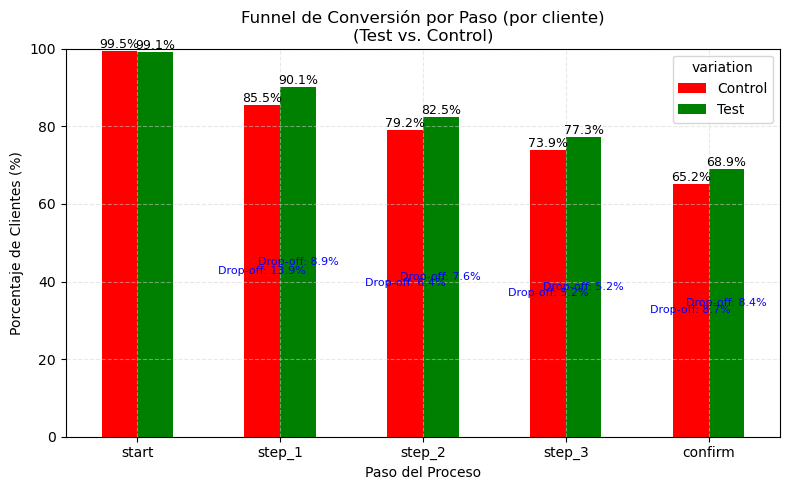

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# PASO 1: Cargar el DataFrame ya procesado
# --------------------------------------------------
df = pd.read_csv("../../data/processed/navegacion_clientes_experimento_limpio.csv")

# Filtrar para incluir sólo clientes de los grupos válidos (Test y Control)
df = df[df["variation"].isin(["Test", "Control"])].copy()

# --------------------------------------------------
# PASO 2: Agrupar a nivel de cliente y construir el funnel
# --------------------------------------------------
# Definir los pasos del proceso
steps = ["start", "step_1", "step_2", "step_3", "confirm"]

# Para cada cliente (client_id) y grupo (variation), determinar si alcanzó cada paso.
client_records = []
for (variation, client_id), group in df.groupby(["variation", "client_id"]):
    record = {"variation": variation, "client_id": client_id}
    for step in steps:
        record[step + "_reached"] = group["process_step"].eq(step).any()
    client_records.append(record)

df_clients = pd.DataFrame(client_records)

# --------------------------------------------------
# PASO 3: Calcular la tasa de conversión (Completion Rate) por paso
# --------------------------------------------------
# Para cada paso, la media de los indicadores booleanos equivale a la proporción de clientes que lo alcanzaron.
funnel_data = {}
for step in steps:
    col = step + "_reached"
    # Se agrupa por variation y se calcula la media
    prop = df_clients.groupby("variation")[col].mean() * 100  # en porcentaje
    funnel_data[step] = prop

# Convertir el diccionario a DataFrame: filas = pasos, columnas = variation
funnel_df = pd.DataFrame(funnel_data).T
# Reordenar las filas según el orden de los pasos
funnel_df = funnel_df.reindex(steps)

print("=== Funnel de Conversión a Nivel de Cliente (por paso) ===")
print(funnel_df)

# --------------------------------------------------
# PASO 4: Graficar el funnel de conversión por paso
# --------------------------------------------------
# Seleccionar solo las columnas "Control" y "Test"
funnel_df = funnel_df[["Control", "Test"]]
color_map = {"Control": "red", "Test": "green", "Unknown": "gray"}
colors = [color_map.get(col, "gray") for col in funnel_df.columns]

fig, ax = plt.subplots(figsize=(8, 5))
funnel_df.plot(kind="bar", ax=ax, color=colors, legend=True)

ax.set_title("Funnel de Conversión por Paso (por cliente)\n(Test vs. Control)")
ax.set_xlabel("Paso del Proceso")
ax.set_ylabel("Porcentaje de Clientes (%)")
ax.set_ylim(0, 100)
ax.grid(True, which="major", axis="both", color="lightgray", linestyle="--", alpha=0.5)

# Añadir etiquetas de porcentaje sobre cada barra
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f"{height:.1f}%",
                    (p.get_x() + p.get_width()/2, height),
                    ha="center", va="bottom", fontsize=9)

# --------------------------------------------------
# PASO 5: Calcular y anotar el drop-off entre pasos
# --------------------------------------------------
# El drop-off se define como la diferencia (en porcentaje) entre el paso anterior y el actual.
drop_off_df = funnel_df.shift(1) - funnel_df  # Para cada grupo, diferencia con la fila anterior

# Añadir anotaciones de drop-off para cada variación, desde el segundo paso en adelante.
for container, variation in zip(ax.containers, funnel_df.columns):
    for i, rect in enumerate(container):
        if i == 0:
            continue  # No hay drop-off para el primer paso
        # Obtener el drop-off del DataFrame: en la fila i (corresponde al paso actual)
        drop_value = drop_off_df.loc[funnel_df.index[i], variation]
        if pd.notna(drop_value) and drop_value > 0:
            # Ubicar la anotación en el centro de la barra actual
            x = rect.get_x() + rect.get_width()/2
            y = rect.get_y() + rect.get_height()/2
            ax.annotate(f"Drop-off: {drop_value:.1f}%",
                        (x, y),
                        ha="center", va="center", fontsize=8, color="blue")


plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
